In [1]:
import numpy as np
import matplotlib.pyplot as plt
def longcall(ST, K, call):
    return np.maximum(ST-K, 0) - call
def shortcall(ST, K, call):
    return -(np.maximum(ST-K, 0) - call)
def longput(ST, K, put):
    return np.maximum(K-ST, 0) - put
def shortput(ST, K, put):
    return -(np.maximum(K-ST, 0) - put)




# 1.

# Short Call

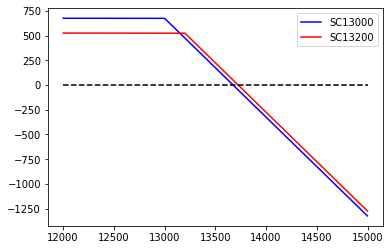

In [3]:
ST = np.arange(12001, 15000)
SC13000 = shortcall(ST, 13000, 675)
SC13200 = shortcall(ST, 13200, 525)
plt.plot(ST, SC13000, 'b-', ST, SC13200, 'r-',[12001, 15000], [0, 0], 'k--')
plt.legend(['SC13000', 'SC13200'])

# Long Put

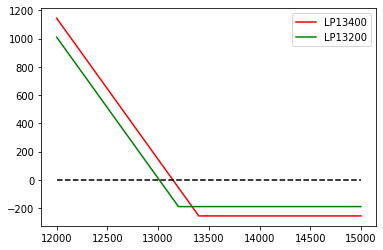

In [4]:
LP13400 = longput(ST, 13400, 255)
LP13200 = longput(ST, 13200, 189)
plt.plot(ST, LP13400, 'r-', ST, LP13200, 'g-', [12001, 15000], [0, 0], 'k--')
plt.legend(['LP13400', 'LP13200'])

# Bear Spread

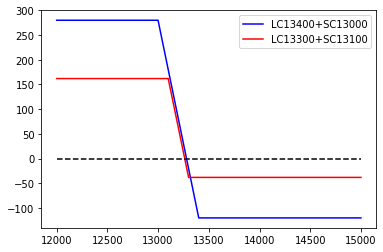

In [5]:
# Spread
LC13400 = longcall(ST, 13400, 395)
SC13000 = shortcall(ST, 13000, 675)
LC13300 = longcall(ST, 13300, 448)
SC13100 = shortcall(ST, 13100, 610)
plt.plot(ST, LC13400+SC13000, 'b-', ST, LC13300+SC13100, 'r-', [12001, 15000], [0, 0], 'k--')
plt.legend(['LC13400+SC13000', 'LC13300+SC13100'])


# 2.

# Butterfly Spread

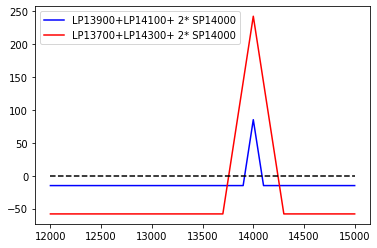

In [13]:
#Butterfly Spread
LP13900 = longput(ST, 13900, 505)
LP14100 = longput(ST, 14100, 640)
SP14000 = shortput(ST, 14000, 565)
LP13700 = longput(ST, 13700, 388)
LP14300 = longput(ST, 14300, 800)
SP14000 = shortput(ST, 14000, 565)
plt.plot(ST, LP13900+LP14100+ 2* SP14000, 'b-', ST, LP13700+LP14300+ 2* SP14000, 'r-' , [12001, 15000], [0, 0], 'k--')
plt.legend(['LP13900+LP14100+ 2* SP14000', 'LP13700+LP14300+ 2* SP14000'])

# Straddle

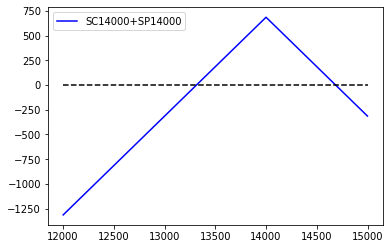

In [14]:
#Straddle
SC14000 = shortcall(ST, 14000, 120)
SP14000 = shortput(ST, 14000, 565)
plt.plot(ST, SC14000+SP14000, 'b-', [12001, 15000], [0, 0], 'k--')
plt.legend(['SC14000+SP14000'])



# Strangle

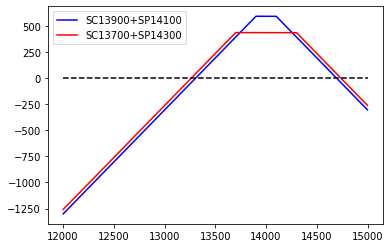

In [22]:
#Strangle
SC13900 = shortput(ST, 13900, 505)
SP14100 = shortcall(ST, 14100, 92)
SC13700 = shortput(ST, 13700, 388)
SP14300 = shortcall(ST, 14300, 52)
plt.plot(ST, SC13900+SP14100, 'b-',ST, SC13700+SP14300, 'r-',  [12001, 15000], [0, 0], 'k--')
plt.legend(['SC13900+SP14100', 'SC13700+SP14300'])

# 3.

In [53]:
Index = np.arange(13000, 15100, 100)
Call = [675, 610, 525, 448, 395, 345, 289, 238, 194, 153, 120, 92, 69, 52, 39.5, 28, 20.5, 16, 12, 9.8, 8.5]
Put = [139, 163, 189, 221, 255, 291, 338, 388, 439, 505, 565, 640, 730, 800, 900, 995, 1090, 1180, 1290, 1380, 1470]

In [63]:
def cal_arbitrage(idx1, idx2):
    SC1 = shortcall(ST, Index[idx1], Call[idx1])
    LP1 = longput(ST, Index[idx1], Put[idx1])
    LC2 = longcall(ST, Index[idx2], Call[idx2])
    SP2 = shortput(ST, Index[idx2], Put[idx2])
    arb = SC1 + LP1 + LC2 + SP2
    ans = arb[500]
    return Index[idx1], Index[idx2], Call[idx1], Put[idx1], Call[idx2], Put[idx2], ans

In [64]:
max_ans = 0
max_ind1, max_ind2, max_c1, max_p1, max_c2, max_p2 = 0, 0, 0, 0, 0, 0
for i in range(21):
    for j in range(i):
        ind1, ind2, c1, p1, c2, p2, ans = cal_arbitrage(i, j)
        print(f"Index1:{ind1}, Index2:{ind2}, Call1:{c1}, Put1:{p1}, Call2:{c2}, Put2:{p2}, arb:{ans}")
        if abs(ans) > max_ans:
            max_ans = abs(ans)
            max_ind1, max_ind2, max_c1, max_p1, max_c2, max_p2 = ind1, ind2, c1, p1, c2, p2
print(f"Index1:{max_ind1}, Index2:{max_ind2}, Call1:{max_c1}, Put1:{max_p1}, Call2:{max_c2}, Put2:{max_p2}, max_arb:{max_ans}")

Index1:13100, Index2:13000, Call1:610, Put1:163, Call2:675, Put2:139, arb:11
Index1:13200, Index2:13000, Call1:525, Put1:189, Call2:675, Put2:139, arb:0
Index1:13200, Index2:13100, Call1:525, Put1:189, Call2:610, Put2:163, arb:-11
Index1:13300, Index2:13000, Call1:448, Put1:221, Call2:675, Put2:139, arb:-9
Index1:13300, Index2:13100, Call1:448, Put1:221, Call2:610, Put2:163, arb:-20
Index1:13300, Index2:13200, Call1:448, Put1:221, Call2:525, Put2:189, arb:-9
Index1:13400, Index2:13000, Call1:395, Put1:255, Call2:675, Put2:139, arb:4
Index1:13400, Index2:13100, Call1:395, Put1:255, Call2:610, Put2:163, arb:-7
Index1:13400, Index2:13200, Call1:395, Put1:255, Call2:525, Put2:189, arb:4
Index1:13400, Index2:13300, Call1:395, Put1:255, Call2:448, Put2:221, arb:13
Index1:13500, Index2:13000, Call1:345, Put1:291, Call2:675, Put2:139, arb:18
Index1:13500, Index2:13100, Call1:345, Put1:291, Call2:610, Put2:163, arb:7
Index1:13500, Index2:13200, Call1:345, Put1:291, Call2:525, Put2:189, arb:18
I

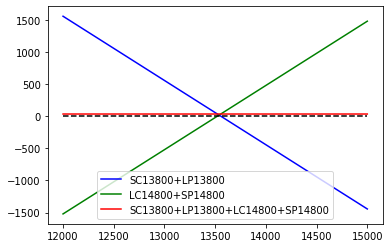

In [67]:
SC13800 = shortcall(ST, 13800, 194)
LP13800 = longput(ST, 13800, 439)
LC14800 = longcall(ST, 14800, 12)
SP14800 = shortput(ST, 14800, 1290)
plt.plot(ST, SC13800+LP13800, 'b-',ST, LC14800+SP14800, 'g-', ST, SC13800+LP13800+LC14800+SP14800, 'r-', [12001, 15000], [0, 0], 'k--')
plt.legend(['SC13800+LP13800', 'LC14800+SP14800', 'SC13800+LP13800+LC14800+SP14800'])